In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Load the movie review data
#movie_reviews = pd.read_csv("movie_reviews.csv")
movies_review = pd.read_csv("https://raw.githubusercontent.com/suyashi29/Generative-AI-for-NLP/main/movie_reviews.csv")

In [4]:
movies_review

,Movie,Review,Sentiment
0,Pulp Fiction,The special effects were incredible.,0
1,The Dark Knight,The film lacked originality.,1
2,Forrest Gump,The screenplay was poorly written.,1
3,Fight Club,Predictable plot.,0
4,The Dark Knight,Disappointing ending.,1
...,...,...,...
3995,The Dark Knight,The screenplay was poorly written.,0
3996,Goodfellas,I didn't like the plot twist.,0
3997,The Shawshank Redemption,The screenplay was poorly written.,1
3998,The Matrix,The screenplay was poorly written.,0


In [6]:
# EDA
print("Summary Statistics:")
print(movies_review.describe())

Summary Statistics:
         Sentiment
count  4000.000000
mean      0.510000
std       0.499962
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [8]:
print(movies_review.describe(include="object"))

             Movie                               Review
count         4000                                 4000
unique          10                                   20
top     Goodfellas  The movie was absolutely fantastic!
freq           435                                  224


In [9]:
movies_review.isnull().sum()

Movie        0
Review       0
Sentiment    0
dtype: int64

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyashi144893\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suyashi144893\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

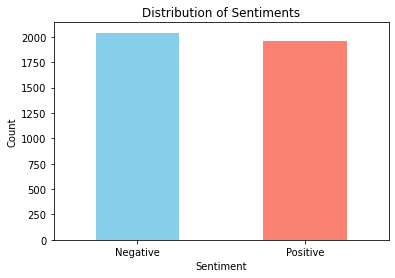

In [11]:
# Distribution of sentiments
plt.figure(figsize=(6, 4))
sentiment_counts = movies_review['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(len(sentiment_counts)), ['Negative', 'Positive'], rotation=0)
plt.show()

# Filter out empty reviews
#movies_review = movies_review.dropna(subset=['Review'])


[Good,Bad, Poor, Good, Bad, Fine]

Good-2
Bad-2
poor-1
Fine-1


{'absolutely': 224, 'acting': 188, 'amazing': 210, 'best': 224, 'boring': 213, 'captivating': 198, 'cast': 198, 'cinematography': 210, 'couldn': 181, 'didn': 219, 'direction': 211, 'disappointing': 190, 'edge': 207, 'effects': 196, 'ending': 190, 'fantastic': 224, 'film': 387, 'great': 198, 'heartwarming': 185, 'highly': 185, 'incredible': 196, 'kept': 207, 'lacked': 202, 'laughing': 181, 'like': 219, 'mediocre': 188, 'movie': 1036, 'movies': 224, 'originality': 202, 'outstanding': 169, 'performances': 198, 'plot': 438, 'poorly': 194, 'predictable': 219, 'recommend': 185, 'ruined': 211, 'screenplay': 194, 'seat': 207, 'seen': 224, 'soundtrack': 169, 'special': 196, 'stop': 181, 'storyline': 198, 'terrible': 211, 'touching': 185, 'twist': 219, 'uninteresting': 213, 've': 224, 'watching': 187, 'worth': 187, 'written': 194}


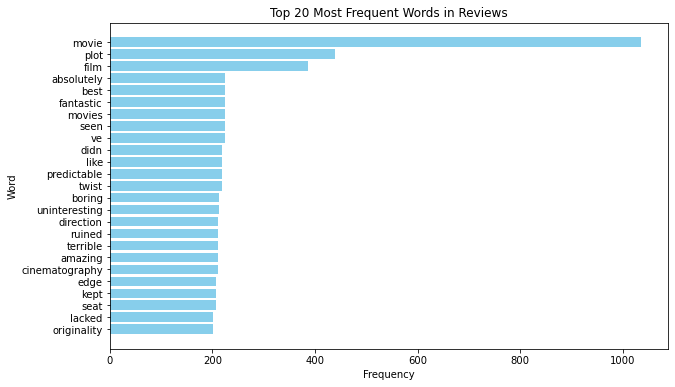

In [14]:
# Visualize the most frequent words in the reviews
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = count_vectorizer.fit_transform(movies_review['Review'])
words = count_vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1
word_freq_dict = dict(zip(words, word_frequencies))
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:25]
print(word_freq_dict)

plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_word_freq], [x[1] for x in sorted_word_freq], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.gca().invert_yaxis()
plt.show()


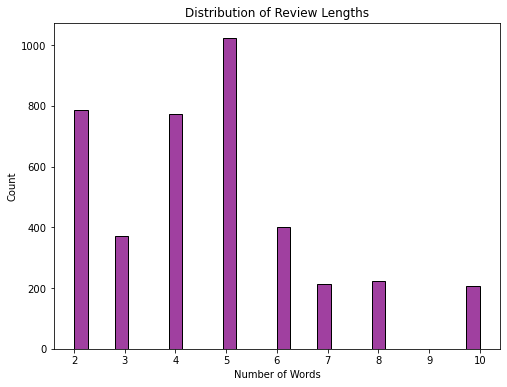

In [15]:
# Analyze the distribution of review lengths
review_lengths = movies_review['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(review_lengths, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()